<div style="max-width:66ch;">

# Lecture notes - Convolutional Neural Networks (CNN)

This is the lecture note for **CNN**. 

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to CNN. I encourage you to read further about CNN. </p>

Read more:
- [Convolutional neural networks - wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network)
- [Conv2D layer - keras](https://keras.io/api/layers/convolution_layers/convolution2d/)
- [CNN for visual recognition - CS231](https://cs231n.github.io/convolutional-networks/)
- [CIFAR10 - Krizhevsky et. al.](https://www.cs.toronto.edu/~kriz/cifar.html)
- [Convolutional neural nets - S. Amidi, CS230 MIT](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks#)

</div>


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
X_train.shape=(50000, 32, 32, 3), X_test.shape=(10000, 32, 32, 3)
y_train.shape=(50000,), y_test.shape=(10000,)


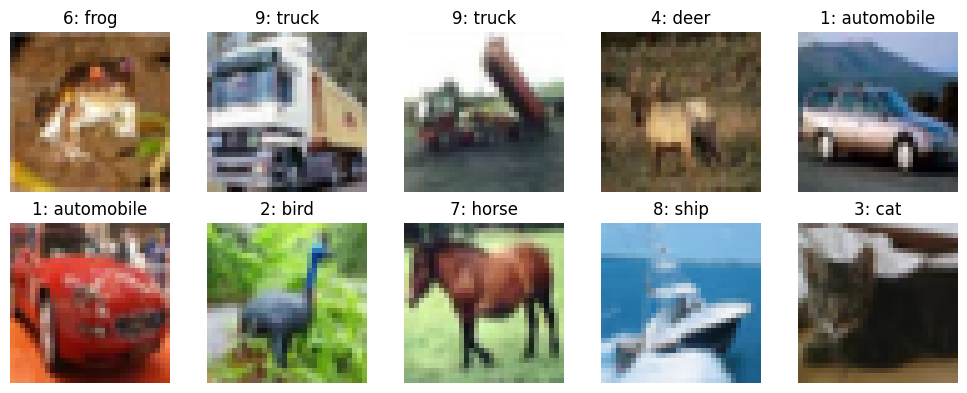

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data


(X_train, y_train), (X_test, y_test) = load_data()
y_train, y_test = y_train.ravel(), y_test.ravel()

labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i: label for i, label in enumerate(labels)}

print(f"{X_train.shape=}, {X_test.shape=}\n{y_train.shape=}, {y_test.shape=}")

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")
fig.tight_layout()


In [2]:
print(f"{X_train.min()=}, {X_train.max()=}")
# normalize to 0-1
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255

X_train.min()=0, X_train.max()=255


<div style="max-width:66ch;">

## CNN model

</div>

In [3]:
from tensorflow.keras.models import Sequential #det är våran startmodell
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout 
from tensorflow.keras.optimizers import Adam


def CNN_model(learning_rate=0.001, drop_rate=0.5, kernels=[32, 64]):

    print(drop_rate)
    # default learning rate in Adam
    adam = Adam(learning_rate=learning_rate)

    model = Sequential(name="CNN_model")

    for number_kernel in kernels: #för varje kernel i kernels
        conv_layer = Conv2D( #convolutional layer
            number_kernel, #antalet kärnor
            kernel_size=(3, 3), #storleken på kärnan 3,3 är standard
            activation="relu", #relu är standard
            kernel_initializer="he_normal", #he_normal är standard
            input_shape=X_train.shape[1:],#input_shape är storleken på bilden
        )

        model.add(conv_layer) #lägger till conv_layer i modellen
        # defaults to pool_size if None
        model.add(MaxPooling2D(pool_size=(2, 2), strides = 2)) #pool_size är storleken på poolen, strides är hur mycket den ska hoppa

    model.add(Flatten()) #flattar ut bilden
    model.add(Dropout(drop_rate)) #dropout är en metod för att undvika overfitting
    model.add(Dense(256, activation="relu", kernel_initializer="he_normal")) #dense är ett vanligt lager
    model.add(Dense(10, activation="softmax")) #dense är ett vanligt lager

    model.compile(#compilen är när vi sätter ihop modellen
        loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["acc"]#loss är hur vi ska mäta hur bra modellen är, optimizer är hur vi ska uppdatera modellen, metrics är vad vi ska mäta
    )

    return model #returnerar modellen

model = CNN_model(.001, .5, [32, 64, 32])#skapar modellen

model.summary() #skriver ut en sammanfattning av modellen


0.5


c:\USERS\SARAM\ONEDRIVE\DOKUMENT\GITHUB\AI-SARA-MELLGREN-OOPA23\VENV\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.callbacks import EarlyStopping #early stopping är en metod för att undvika overfitting

# want to minimize monitored metric (val_loss)
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15) #skapar en early stopper

model.fit(#fit är när vi tränar modellen
    scaled_X_train, #träningsdata
    y_train, #träningslabels
    epochs=100, #antal gånger vi tränar modellen
    callbacks=[early_stopper], #callbacks är metoder som körs under träningen
    validation_split=1 / 5, #valideringsdata
)#tränar modellen

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - acc: 0.2262 - loss: 2.0443 - val_acc: 0.4277 - val_loss: 1.5490
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - acc: 0.4237 - loss: 1.5562 - val_acc: 0.5357 - val_loss: 1.3175
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - acc: 0.4845 - loss: 1.4069 - val_acc: 0.5716 - val_loss: 1.1882
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.5356 - loss: 1.2795 - val_acc: 0.5973 - val_loss: 1.1504
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.5602 - loss: 1.2131 - val_acc: 0.6143 - val_loss: 1.0770
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - acc: 0.5813 - loss: 1.1532 - val_acc: 0.6287 - val_loss: 1.0713
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - acc: 0.5955 - loss: 1.1181 - val_acc: 0.6477 - val_loss: 1.0019
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - acc: 0.6055 - loss: 1.0833 - val_acc: 0.6551 - val_loss: 0.9893
Epoch 9/100
1250/12

In [5]:
metrics = pd.DataFrame(model.history.history)#skapar en dataframe av historiken
metrics.head()#skriver ut de första raderna i dataframen

,acc,loss,val_acc,val_loss
0,0.300400,1.842806,0.4277,1.549024
1,0.442375,1.514973,0.5357,1.317527
2,0.495150,1.382914,0.5716,1.188160
3,0.538375,1.270555,0.5973,1.150406
4,0.565275,1.200822,0.6143,1.077042


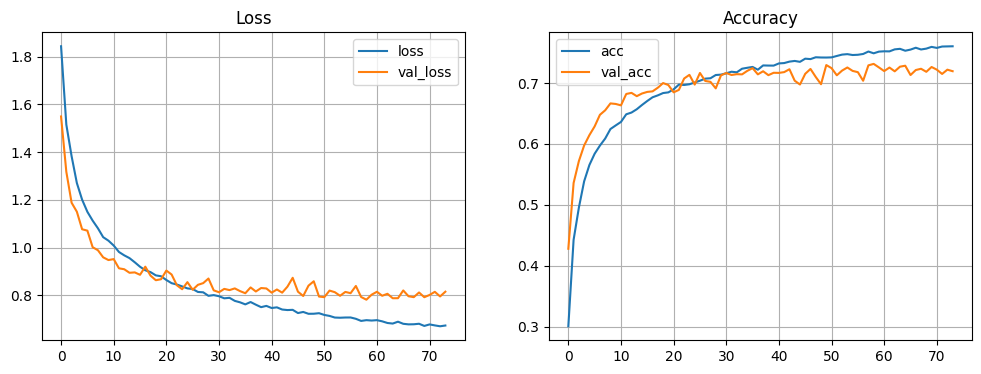

In [6]:
def plot_metrics(metrics):#skapar en funktion som plottar metriker
    _, ax = plt.subplots(1,2, figsize = (12,4))#skapar en figur med 2 axlar
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)#plottar loss och val_loss på ax[0]
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)#plottar acc och val_acc på ax[1]

plot_metrics(metrics)#plottar metriker

<div style="max-width:66ch;">

## Hyperparameter tuning 
We can tune several parameters, e.g.
- dropout rate
- learning rate
- different network configurations

For simplicity we only tune dropout rate here

</div>

In [7]:
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)#skapar en early stopper


def evaluate_model(**kwargs):#skapar en funktion som utvärderar modellen
    model = CNN_model(**kwargs)#skapar en modell
    model.fit(#tränar modellen
        scaled_X_train,#träningsdata
        y_train,#träningslabels
        validation_split=1 / 6,#valideringsdata
        epochs=15,  # small epochs to make training faster
        callbacks=[early_stopper],#callbacks är metoder som körs under träningen
    )
    metrics = pd.DataFrame(model.history.history)#skapar en dataframe av historiken

    val_acc = metrics["val_acc"].iloc[-1]#val_acc är den sista raden i val_acc
    return val_acc#returnerar val_acc


In [8]:
dropout_accuracies = {}#skapar en tom dictionary
for drop_rate in np.arange(.1, .6, .1):#för varje drop_rate i intervallet .1 till .6 med steglängd .1
    # because of floating point precision
    drop_rate = np.round(drop_rate,1) #avrundar drop_rate till en decimal
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate = drop_rate)#lägger till drop_rate och val_acc i dictionaryn


0.1


c:\USERS\SARAM\ONEDRIVE\DOKUMENT\GITHUB\AI-SARA-MELLGREN-OOPA23\VENV\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - acc: 0.4293 - loss: 1.6015 - val_acc: 0.6108 - val_loss: 1.0967
Epoch 2/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - acc: 0.6353 - loss: 1.0418 - val_acc: 0.6603 - val_loss: 0.9673
Epoch 3/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - acc: 0.7021 - loss: 0.8557 - val_acc: 0.6879 - val_loss: 0.9003
Epoch 4/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - acc: 0.7542 - loss: 0.7130 - val_acc: 0.7061 - val_loss: 0.8659
Epoch 5/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - acc: 0.8000 - loss: 0.5773 - val_acc: 0.6934 - val_loss: 0.9082
Epoch 6/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - acc: 0.8339 - loss: 0.4819 - val_acc: 0.7072 - val_loss: 0.9267
Epoch 7/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - acc: 0.8672 - loss: 0.3863 - val_acc: 0.7076 - val_loss: 0.9614
Epoch 8/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - acc: 0.8961 - loss: 0.3052 - val_acc: 0.7184 - val_loss: 0.9841
Epoch 9/15
1303/1303 ━━━

<Axes: title={'center': 'Tuning dropouts'}, xlabel='Dropouts', ylabel='Validation accuracy'>

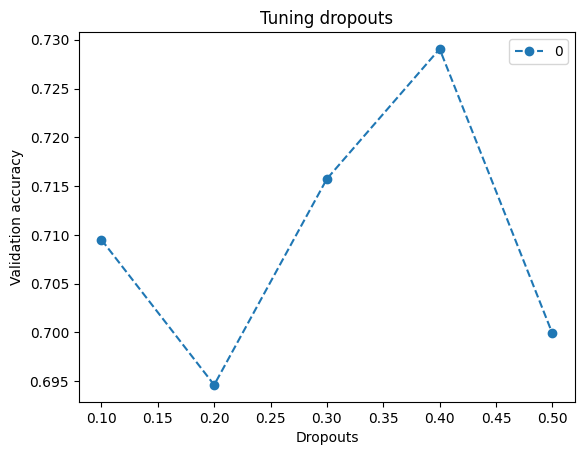

In [9]:
pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title="Tuning dropouts", xlabel="Dropouts", ylabel="Validation accuracy", style = "--o"
)


## Train and evaluate on chosen model

In [10]:
# note that we can't use early stopping here as we will train on all training data and no validation
# don't use test data as validation data here 

model_final = CNN_model(drop_rate = .5)

model_final.fit(scaled_X_train, y_train, epochs = 20)



0.5


c:\USERS\SARAM\ONEDRIVE\DOKUMENT\GITHUB\AI-SARA-MELLGREN-OOPA23\VENV\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - acc: 0.4031 - loss: 1.6517
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - acc: 0.5880 - loss: 1.1529
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - acc: 0.6497 - loss: 0.9970
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - acc: 0.6840 - loss: 0.8914
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - acc: 0.7186 - loss: 0.7983
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - acc: 0.7413 - loss: 0.7433
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - acc: 0.7591 - loss: 0.6919
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - acc: 0.7783 - loss: 0.6379
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - acc: 0.7911 - loss: 0.5961
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - acc: 0.8068 - loss: 0.5550
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - acc: 0.8163 - loss: 0.5274
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - acc:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1000
           1       0.88      0.84      0.86      1000
           2       0.70      0.55      0.62      1000
           3       0.50      0.59      0.54      1000
           4       0.74      0.59      0.66      1000
           5       0.66      0.60      0.63      1000
           6       0.69      0.83      0.75      1000
           7       0.76      0.73      0.74      1000
           8       0.78      0.84      0.81      1000
           9       0.73      0.87      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



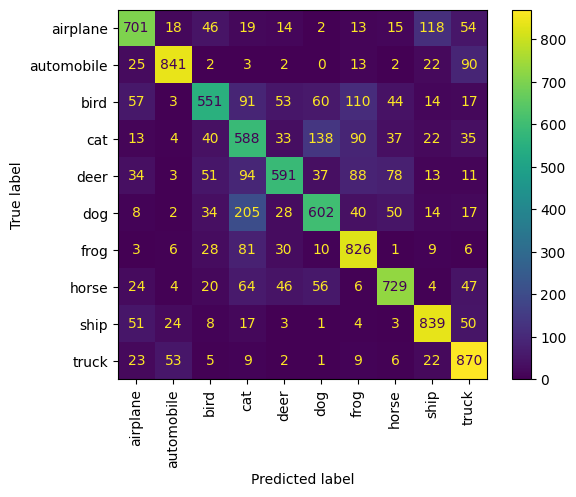

In [11]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = model.predict(scaled_X_test)
#y_pred = np.argmax(y_pred)

y_pred = np.argmax(y_pred, axis = 1)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xticks(rotation = 90);

<div style="max-width:66ch;">

## Summary

In this lecture we've covered simple image processing using opencv and some convolutional kernels, which are the foundations to convolutional neural networks (CNN).

</div>

<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
